In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import datetime

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

In [3]:
data = pd.read_excel('data_modified.xlsx', sheet_name='Stock Movement')

In [4]:
df = data.copy()

In [6]:
df.set_index('id', inplace=True)

In [7]:
df

,trans_id,qty,trans_date,trans_cat,warehouse_code,tenant_code
id,,,,,,
1,INB00359486,40,2020-10-22 14:20:00,Inbound,WH3,XYZ
2,OUT00000412,1,2020-10-24 11:46:00,Outbound,WH3,XYZ
3,OUT00003133,1,2020-10-26 14:04:00,Outbound,WH3,XYZ
4,OUT00001393,1,2020-10-28 14:20:00,Outbound,WH3,XYZ
5,INB00360130,7,2020-10-28 14:58:00,Inbound,WH3,XYZ
...,...,...,...,...,...,...
100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,WH3,XYZ
100571,INB00362586,2,2020-11-27 17:35:00,Inbound,WH3,XYZ
100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,WH3,XYZ


In [45]:
year_2021_bool = df['trans_date'].dt.year==2021

month_jan_bool = df['trans_date'].dt.month==1
month_feb_bool = df['trans_date'].dt.month==2
month_mar_bool = df['trans_date'].dt.month==3

outbound_bool = df['trans_cat']=='Outbound'

In [46]:
out_2021_jan_sum = df['qty'][(year_2021_bool) & (month_jan_bool) & (outbound_bool)].sum()
out_2021_feb_sum = df['qty'][(year_2021_bool) & (month_feb_bool) & (outbound_bool)].sum()
out_2021_mar_sum = df['qty'][(year_2021_bool) & (month_mar_bool) & (outbound_bool)].sum()

In [36]:
out_2021_jan_sum

15664

In [35]:
out_2021_feb_sum

21888

In [52]:
df_percent = pd.DataFrame()

In [53]:
df_percent['Month'] = ['January', 'February', 'March']
df_percent['Sum'] = [out_2021_jan_sum, out_2021_feb_sum, out_2021_mar_sum]

In [74]:
df_percent

,Month,Sum
0,January,15664
1,February,21888
2,March,12382


(12000.0, 22000.0)

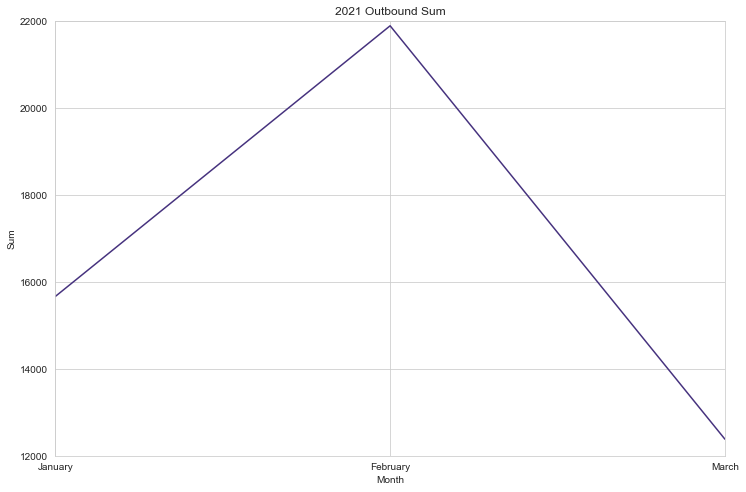

In [82]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Sum', data=df_percent)
plt.title('2021 Outbound Sum')
plt.xlim('January', 'March')
plt.ylim(12000, 22000)

In [58]:
ori = 90
new = 86

In [59]:
inc = new - ori

In [61]:
(inc/ori) * 100

-4.444444444444445

In [72]:
print('Outbound 2021 in February has changed {0:.2f}% from January'.format(((out_2021_feb_sum - out_2021_jan_sum) / out_2021_jan_sum)*100))
print('Outbound 2021 in March has changed {0:.2f}% from February'.format(((out_2021_mar_sum - out_2021_feb_sum) / out_2021_feb_sum)*100))

Outbound 2021 in February has changed 39.73% from January
Outbound 2021 in March has changed -43.43% from February


In [83]:
df

,trans_id,qty,trans_date,trans_cat,warehouse_code,tenant_code
id,,,,,,
1,INB00359486,40,2020-10-22 14:20:00,Inbound,WH3,XYZ
2,OUT00000412,1,2020-10-24 11:46:00,Outbound,WH3,XYZ
3,OUT00003133,1,2020-10-26 14:04:00,Outbound,WH3,XYZ
4,OUT00001393,1,2020-10-28 14:20:00,Outbound,WH3,XYZ
5,INB00360130,7,2020-10-28 14:58:00,Inbound,WH3,XYZ
...,...,...,...,...,...,...
100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,WH3,XYZ
100571,INB00362586,2,2020-11-27 17:35:00,Inbound,WH3,XYZ
100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,WH3,XYZ


In [92]:
print('Warehouses Inbound')
print(df['warehouse_code'][df['trans_cat']=='Inbound'].value_counts())

Warehouses Inbound
WH3    1380
WH1    1356
WH2    1242
WH4    1233
Name: warehouse_code, dtype: int64


In [93]:
print('Warehouses Outbound')
print(df['warehouse_code'][df['trans_cat']=='Outbound'].value_counts())

Warehouses Outbound
WH1    31167
WH3    22005
WH4    17533
WH2    16725
Name: warehouse_code, dtype: int64


Text(0.5, 0, 'Activity')

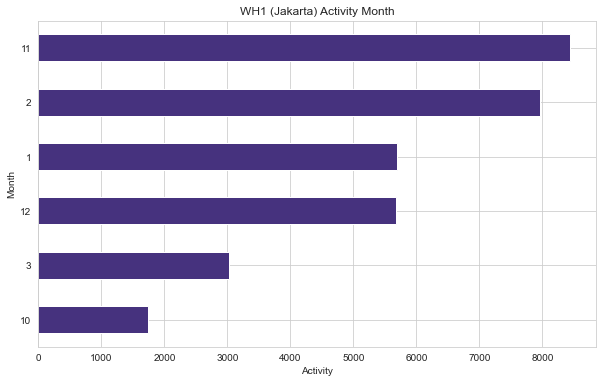

In [114]:
plt.figure(figsize=(10, 6))
df['trans_date'][(df['warehouse_code']=='WH1')].dt.month.value_counts().sort_values().plot(kind='barh')
plt.title('WH1 (Jakarta) Activity Month')
plt.ylabel('Month')
plt.xlabel('Activity')

Text(0.5, 0, 'Activity')

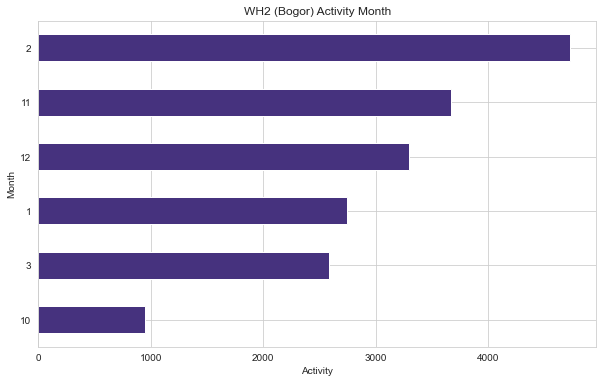

In [122]:
plt.figure(figsize=(10, 6))
df['trans_date'][(df['warehouse_code']=='WH2')].dt.month.value_counts().sort_values().plot(kind='barh')
plt.title('WH2 (Bogor) Activity Month')
plt.ylabel('Month')
plt.xlabel('Activity')

Text(0.5, 0, 'Activity')

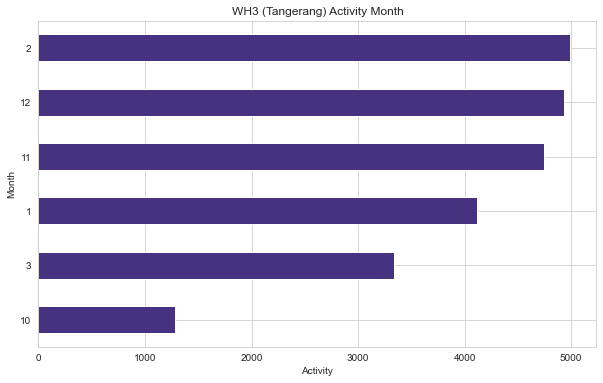

In [119]:
plt.figure(figsize=(10, 6))
df['trans_date'][(df['warehouse_code']=='WH3')].dt.month.value_counts().sort_values().plot(kind='barh')
plt.title('WH3 (Tangerang) Activity Month')
plt.ylabel('Month')
plt.xlabel('Activity')

Text(0.5, 0, 'Activity')

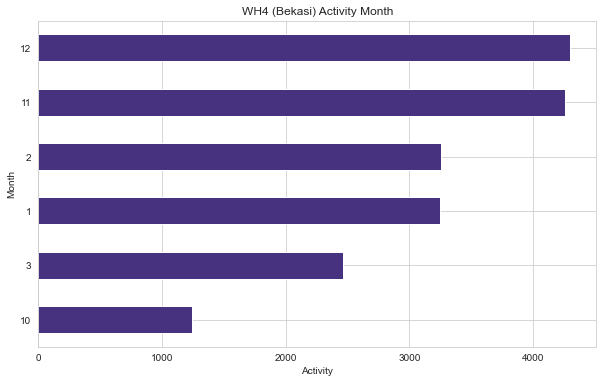

In [118]:
plt.figure(figsize=(10, 6))
df['trans_date'][(df['warehouse_code']=='WH4')].dt.month.value_counts().sort_values().plot(kind='barh')
plt.title('WH4 (Bekasi) Activity Month')
plt.ylabel('Month')
plt.xlabel('Activity')